In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
gold_df = pd.read_csv("/content/drive/MyDrive/Gold Price/gld_price_data.csv")

In [3]:
gold_df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
gold_df.shape

(2290, 6)

In [8]:
gold_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [9]:
gold_df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [7]:
gold_df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation :

1. Positive Correlation

2. Negative Correlation


In [10]:
correlation = gold_df.corr()

<ipython-input-10-695efec6c466>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_df.corr()


<Axes: >

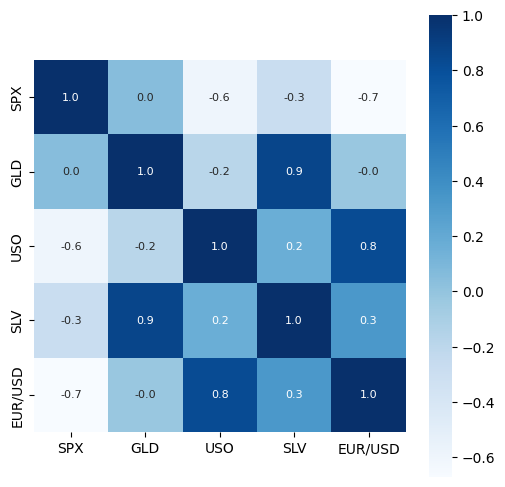

In [15]:
plt.figure(figsize=(6,6))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [16]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-18-2fd7e86fede4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_df['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

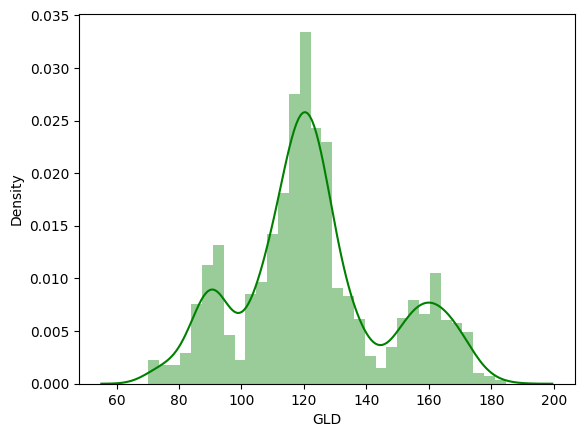

In [18]:
# checking the distribution of the gold price
sns.distplot(gold_df['GLD'],color='green')

In [19]:
# splitting the Features and Target
X= gold_df.drop(['Date','GLD'],axis=1)
Y= gold_df['GLD']

In [20]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [21]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [22]:
# Splitting into Training Data and Test Data
X_train , X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2, random_state=2)

Model Training :

In [24]:
regressor = RandomForestRegressor(n_estimators=100)
# n_esti= defolt number

In [25]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [26]:
# Model Prediction on test data
test_data_prediction = regressor.predict(X_test)

In [27]:
print(test_data_prediction)

[168.70630007  82.2448998  115.94960031 127.73920074 120.56680117
 154.73039793 150.09719812 126.0628003  117.5443987  126.03510039
 116.85010097 171.45580094 141.58049885 167.93009885 115.23020042
 117.77260066 138.67470292 170.1157009  159.01110252 158.02129934
 155.18350031 125.13639991 175.80099956 157.00300328 125.24950026
  93.7615998   77.39530033 120.60340024 119.02559904 167.48769957
  88.29660074 125.4122003   91.13120064 117.79770016 120.98809883
 136.36580004 115.50360131 115.52570061 147.50469987 107.43060049
 103.99290255  87.25269802 126.51380054 117.88730028 151.8341994
 119.65419974 108.45739982 107.94239856  93.11190041 127.30759724
  75.09060016 113.78469919 121.38830033 111.17489912 118.77529903
 121.01139961 159.39760016 168.30360076 146.88859725  85.57589841
  94.10480027  86.84479896  90.43790029 118.98340078 126.37800096
 127.78559989 170.6954     122.38749962 117.51869848  98.33720014
 168.26580156 142.7661982  132.50990228 121.2245025  120.68759943
 119.762900

In [28]:
# R squared error
error_score = metrics.r2_score(Y_test,test_data_prediction)
print('R square error:',error_score)

R square error: 0.9884316898740603


Compare the actual value and predicted values in a plot

In [29]:
Y_test=list(Y_test)

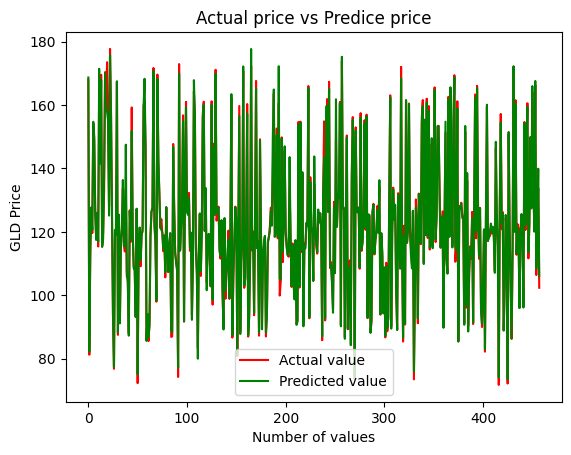

In [33]:
plt.plot(Y_test,color='red',label='Actual value')
plt.plot(test_data_prediction,color='green',label='Predicted value')
plt.title("Actual price vs Predice price")
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()